# Implementation of Multivariate Linear Regression and Clustering

For this dataset, I have implemented linear regression and two types of clustering.(K-Means and Hierarchical Clustering)

In [182]:
#Importing the packages.
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [186]:
d=pd.read_csv("freight.csv", low_memory=False)

In [187]:
d

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,...,o_dep_3_p,o_dep_3_e,o_dep_3_place,o_rcf_3_p,o_rcf_3_e,o_rcf_3_place,o_dlv_p,o_dlv_e,o_hops,legs
0,0.0,5182.0,199.0,218.0,210.0,215.0,609.0,935.0,736.0,256.0,...,?,?,?,?,?,?,780.0,434.0,1.0,2.0
1,1.0,6523.0,844.0,584.0,90.0,297.0,700.0,1935.0,1415.0,431.0,...,?,?,?,?,?,?,3870.0,445.0,1.0,2.0
2,2.0,5878.0,4380.0,4119.0,90.0,280.0,456.0,905.0,547.0,700.0,...,?,?,?,?,?,?,550.0,1520.0,1.0,1.0
3,3.0,1275.0,759.0,169.0,240.0,777.0,173.0,340.0,577.0,349.0,...,?,?,?,?,?,?,3780.0,159.0,1.0,1.0
4,4.0,8117.0,1597.0,1485.0,150.0,241.0,411.0,585.0,612.0,128.0,...,?,?,?,?,?,?,4140.0,4797.0,2.0,1.0
5,5.0,9889.0,181.0,98.0,240.0,259.0,815.0,215.0,223.0,128.0,...,?,?,?,?,?,?,3960.0,467.0,1.0,2.0
6,6.0,3997.0,1300.0,212.0,240.0,1267.0,815.0,270.0,135.0,391.0,...,?,?,?,?,?,?,2880.0,151.0,1.0,3.0
7,7.0,7125.0,139.0,87.0,240.0,232.0,783.0,255.0,154.0,815.0,...,?,?,?,?,?,?,3960.0,161.0,1.0,2.0
8,8.0,10481.0,387.0,68.0,240.0,514.0,815.0,285.0,219.0,485.0,...,?,?,?,?,?,?,6680.0,2830.0,1.0,1.0
9,9.0,3212.0,6145.0,6013.0,300.0,385.0,690.0,810.0,635.0,555.0,...,?,?,?,?,?,?,3960.0,218.0,1.0,1.0


In [188]:
d_replace = d.replace('?',np.nan)

In [189]:
d_replace

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,...,o_dep_3_p,o_dep_3_e,o_dep_3_place,o_rcf_3_p,o_rcf_3_e,o_rcf_3_place,o_dlv_p,o_dlv_e,o_hops,legs
0,0.0,5182.0,199.0,218.0,210.0,215.0,609.0,935.0,736.0,256.0,...,NaN,NaN,NaN,NaN,NaN,NaN,780.0,434.0,1.0,2.0
1,1.0,6523.0,844.0,584.0,90.0,297.0,700.0,1935.0,1415.0,431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3870.0,445.0,1.0,2.0
2,2.0,5878.0,4380.0,4119.0,90.0,280.0,456.0,905.0,547.0,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,550.0,1520.0,1.0,1.0
3,3.0,1275.0,759.0,169.0,240.0,777.0,173.0,340.0,577.0,349.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3780.0,159.0,1.0,1.0
4,4.0,8117.0,1597.0,1485.0,150.0,241.0,411.0,585.0,612.0,128.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4140.0,4797.0,2.0,1.0
5,5.0,9889.0,181.0,98.0,240.0,259.0,815.0,215.0,223.0,128.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3960.0,467.0,1.0,2.0
6,6.0,3997.0,1300.0,212.0,240.0,1267.0,815.0,270.0,135.0,391.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2880.0,151.0,1.0,3.0
7,7.0,7125.0,139.0,87.0,240.0,232.0,783.0,255.0,154.0,815.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3960.0,161.0,1.0,2.0
8,8.0,10481.0,387.0,68.0,240.0,514.0,815.0,285.0,219.0,485.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6680.0,2830.0,1.0,1.0
9,9.0,3212.0,6145.0,6013.0,300.0,385.0,690.0,810.0,635.0,555.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3960.0,218.0,1.0,1.0


In [190]:
d_replace.isnull().sum()

nr                   1
i1_legid             1
i1_rcs_p             1
i1_rcs_e             1
i1_dep_1_p           1
i1_dep_1_e           1
i1_dep_1_place       1
i1_rcf_1_p           1
i1_rcf_1_e           1
i1_rcf_1_place       1
i1_dep_2_p        2748
i1_dep_2_e        2748
i1_dep_2_place    2748
i1_rcf_2_p        2748
i1_rcf_2_e        2748
i1_rcf_2_place    2748
i1_dep_3_p        3920
i1_dep_3_e        3920
i1_dep_3_place    3920
i1_rcf_3_p        3920
i1_rcf_3_e        3920
i1_rcf_3_place    3920
i1_dlv_p             1
i1_dlv_e             1
i1_hops              1
i2_legid          1319
i2_rcs_p          1319
i2_rcs_e          1319
i2_dep_1_p        1319
i2_dep_1_e        1319
                  ... 
i3_rcf_3_e        3935
i3_rcf_3_place    3935
i3_dlv_p          2577
i3_dlv_e          2577
i3_hops           2577
o_legid              1
o_rcs_p              1
o_rcs_e              1
o_dep_1_p            1
o_dep_1_e            1
o_dep_1_place        1
o_rcf_1_p            1
o_rcf_1_e  

In [191]:
from sklearn.base import TransformerMixin

X = pd.DataFrame(d_replace)

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


df = DataFrameImputer().fit_transform(d_replace)

df
# imputes missing values
#credits-https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,...,o_dep_3_p,o_dep_3_e,o_dep_3_place,o_rcf_3_p,o_rcf_3_e,o_rcf_3_place,o_dlv_p,o_dlv_e,o_hops,legs
0,0.000000,5182.000000,199.000000,218.00000,210.000000,215.000000,609.000000,935.00000,736.000000,256.000000,...,170,1400,411,2910,185,567,780.000000,434.000000,1.000000,2.000000
1,1.000000,6523.000000,844.000000,584.00000,90.000000,297.000000,700.000000,1935.00000,1415.000000,431.000000,...,170,1400,411,2910,185,567,3870.000000,445.000000,1.000000,2.000000
2,2.000000,5878.000000,4380.000000,4119.00000,90.000000,280.000000,456.000000,905.00000,547.000000,700.000000,...,170,1400,411,2910,185,567,550.000000,1520.000000,1.000000,1.000000
3,3.000000,1275.000000,759.000000,169.00000,240.000000,777.000000,173.000000,340.00000,577.000000,349.000000,...,170,1400,411,2910,185,567,3780.000000,159.000000,1.000000,1.000000
4,4.000000,8117.000000,1597.000000,1485.00000,150.000000,241.000000,411.000000,585.00000,612.000000,128.000000,...,170,1400,411,2910,185,567,4140.000000,4797.000000,2.000000,1.000000
5,5.000000,9889.000000,181.000000,98.00000,240.000000,259.000000,815.000000,215.00000,223.000000,128.000000,...,170,1400,411,2910,185,567,3960.000000,467.000000,1.000000,2.000000
6,6.000000,3997.000000,1300.000000,212.00000,240.000000,1267.000000,815.000000,270.00000,135.000000,391.000000,...,170,1400,411,2910,185,567,2880.000000,151.000000,1.000000,3.000000
7,7.000000,7125.000000,139.000000,87.00000,240.000000,232.000000,783.000000,255.00000,154.000000,815.000000,...,170,1400,411,2910,185,567,3960.000000,161.000000,1.000000,2.000000
8,8.000000,10481.000000,387.000000,68.00000,240.000000,514.000000,815.000000,285.00000,219.000000,485.000000,...,170,1400,411,2910,185,567,6680.000000,2830.000000,1.000000,1.000000
9,9.000000,3212.000000,6145.000000,6013.00000,300.000000,385.000000,690.000000,810.00000,635.000000,555.000000,...,170,1400,411,2910,185,567,3960.000000,218.000000,1.000000,1.000000


In [192]:
df.isnull().sum()

nr                0
i1_legid          0
i1_rcs_p          0
i1_rcs_e          0
i1_dep_1_p        0
i1_dep_1_e        0
i1_dep_1_place    0
i1_rcf_1_p        0
i1_rcf_1_e        0
i1_rcf_1_place    0
i1_dep_2_p        0
i1_dep_2_e        0
i1_dep_2_place    0
i1_rcf_2_p        0
i1_rcf_2_e        0
i1_rcf_2_place    0
i1_dep_3_p        0
i1_dep_3_e        0
i1_dep_3_place    0
i1_rcf_3_p        0
i1_rcf_3_e        0
i1_rcf_3_place    0
i1_dlv_p          0
i1_dlv_e          0
i1_hops           0
i2_legid          0
i2_rcs_p          0
i2_rcs_e          0
i2_dep_1_p        0
i2_dep_1_e        0
                 ..
i3_rcf_3_e        0
i3_rcf_3_place    0
i3_dlv_p          0
i3_dlv_e          0
i3_hops           0
o_legid           0
o_rcs_p           0
o_rcs_e           0
o_dep_1_p         0
o_dep_1_e         0
o_dep_1_place     0
o_rcf_1_p         0
o_rcf_1_e         0
o_rcf_1_place     0
o_dep_2_p         0
o_dep_2_e         0
o_dep_2_place     0
o_rcf_2_p         0
o_rcf_2_e         0


In [193]:
df.dtypes


nr                float64
i1_legid          float64
i1_rcs_p          float64
i1_rcs_e          float64
i1_dep_1_p        float64
i1_dep_1_e        float64
i1_dep_1_place    float64
i1_rcf_1_p        float64
i1_rcf_1_e        float64
i1_rcf_1_place    float64
i1_dep_2_p         object
i1_dep_2_e         object
i1_dep_2_place     object
i1_rcf_2_p         object
i1_rcf_2_e         object
i1_rcf_2_place     object
i1_dep_3_p         object
i1_dep_3_e         object
i1_dep_3_place     object
i1_rcf_3_p         object
i1_rcf_3_e         object
i1_rcf_3_place     object
i1_dlv_p          float64
i1_dlv_e          float64
i1_hops           float64
i2_legid           object
i2_rcs_p           object
i2_rcs_e           object
i2_dep_1_p         object
i2_dep_1_e         object
                   ...   
i3_rcf_3_e         object
i3_rcf_3_place     object
i3_dlv_p           object
i3_dlv_e           object
i3_hops            object
o_legid           float64
o_rcs_p           float64
o_rcs_e     

In [194]:
ds = df.astype(float) #Converts the whole dataset into type 'float' for ease in visualization.

In [195]:
ds

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,...,o_dep_3_p,o_dep_3_e,o_dep_3_place,o_rcf_3_p,o_rcf_3_e,o_rcf_3_place,o_dlv_p,o_dlv_e,o_hops,legs
0,0.000000,5182.000000,199.000000,218.00000,210.000000,215.000000,609.000000,935.00000,736.000000,256.000000,...,170.0,1400.0,411.0,2910.0,185.0,567.0,780.000000,434.000000,1.000000,2.000000
1,1.000000,6523.000000,844.000000,584.00000,90.000000,297.000000,700.000000,1935.00000,1415.000000,431.000000,...,170.0,1400.0,411.0,2910.0,185.0,567.0,3870.000000,445.000000,1.000000,2.000000
2,2.000000,5878.000000,4380.000000,4119.00000,90.000000,280.000000,456.000000,905.00000,547.000000,700.000000,...,170.0,1400.0,411.0,2910.0,185.0,567.0,550.000000,1520.000000,1.000000,1.000000
3,3.000000,1275.000000,759.000000,169.00000,240.000000,777.000000,173.000000,340.00000,577.000000,349.000000,...,170.0,1400.0,411.0,2910.0,185.0,567.0,3780.000000,159.000000,1.000000,1.000000
4,4.000000,8117.000000,1597.000000,1485.00000,150.000000,241.000000,411.000000,585.00000,612.000000,128.000000,...,170.0,1400.0,411.0,2910.0,185.0,567.0,4140.000000,4797.000000,2.000000,1.000000
5,5.000000,9889.000000,181.000000,98.00000,240.000000,259.000000,815.000000,215.00000,223.000000,128.000000,...,170.0,1400.0,411.0,2910.0,185.0,567.0,3960.000000,467.000000,1.000000,2.000000
6,6.000000,3997.000000,1300.000000,212.00000,240.000000,1267.000000,815.000000,270.00000,135.000000,391.000000,...,170.0,1400.0,411.0,2910.0,185.0,567.0,2880.000000,151.000000,1.000000,3.000000
7,7.000000,7125.000000,139.000000,87.00000,240.000000,232.000000,783.000000,255.00000,154.000000,815.000000,...,170.0,1400.0,411.0,2910.0,185.0,567.0,3960.000000,161.000000,1.000000,2.000000
8,8.000000,10481.000000,387.000000,68.00000,240.000000,514.000000,815.000000,285.00000,219.000000,485.000000,...,170.0,1400.0,411.0,2910.0,185.0,567.0,6680.000000,2830.000000,1.000000,1.000000
9,9.000000,3212.000000,6145.000000,6013.00000,300.000000,385.000000,690.000000,810.00000,635.000000,555.000000,...,170.0,1400.0,411.0,2910.0,185.0,567.0,3960.000000,218.000000,1.000000,1.000000


In [196]:
%matplotlib inline 
np.random.seed(sum(map(ord, "distributions")))

In [197]:
# Displaying volues of correlation greater than a specific threshold

corr_val=0.8
dsp1 = dsp.corr().unstack().reset_index()
dsp1[dsp1[0]>corr_val]

,level_0,level_1,0
0,nr,nr,1.000000
99,i1_legid,i1_legid,1.000000
198,i1_rcs_p,i1_rcs_p,1.000000
199,i1_rcs_p,i1_rcs_e,0.995350
296,i1_rcs_e,i1_rcs_p,0.995350
297,i1_rcs_e,i1_rcs_e,1.000000
396,i1_dep_1_p,i1_dep_1_p,1.000000
495,i1_dep_1_e,i1_dep_1_e,1.000000
594,i1_dep_1_place,i1_dep_1_place,1.000000
693,i1_rcf_1_p,i1_rcf_1_p,1.000000


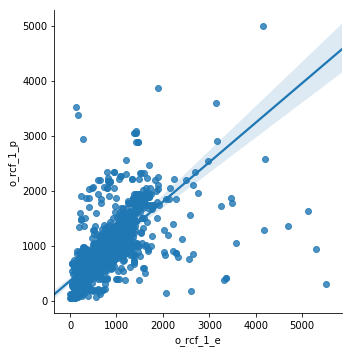

In [198]:
sns.lmplot(y="o_rcf_1_p", x="o_rcf_1_e", data=ds)
plt.show()

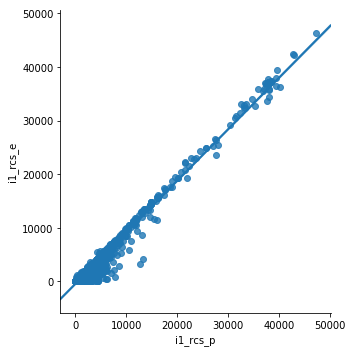

In [199]:
sns.lmplot(y="i1_rcs_e", x="i1_rcs_p", data=ds)
plt.show()

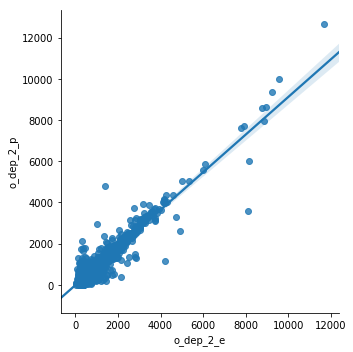

In [200]:
sns.lmplot(y="o_dep_2_p", x="o_dep_2_e", data=ds)
plt.show()

In [201]:
# from sklearn import linear_model

x = ds[["i1_rcs_p"]]
y = ds[["i1_rcs_e"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(x, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[-465.41726904] [[ 0.96151963]]


In [202]:
# import statsmodels.api as sm
# Note the swap of x and y
model = sm.OLS(y, x) # For calculating output w.r.t. the regression formula
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               i1_rcs_e   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.413e+05
Date:                Wed, 14 Feb 2018   Prob (F-statistic):               0.00
Time:                        20:03:46   Log-Likelihood:                -31942.
No. Observations:                3943   AIC:                         6.389e+04
Df Residuals:                    3942   BIC:                         6.389e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
i1_rcs_p       0.9232      0.002    375.929      0.000       0.918       0.928
==============================================================================
Omnibus:                     2049.563   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44524.758
Skew:                          -1.995   Prob(JB):                         0.00
Kurtosis:                      18.972   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Very good fit between the attributes ($R^{2}$ = 0.973). This means the timings between planned and estimated check-ins of Incoming Transport leg 1 is highly efficient!

In [203]:
leg_1_p = ols("i1_dlv_p ~ i1_rcs_p + i1_dep_1_p + i1_rcf_1_p -1", data=ds).fit()
leg_1_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               i1_dlv_p   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     2015.
Date:                Wed, 14 Feb 2018   Prob (F-statistic):               0.00
Time:                        20:03:46   Log-Likelihood:                -36531.
No. Observations:                3943   AIC:                         7.307e+04
Df Residuals:                    3940   BIC:                         7.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
i1_rcs_p       0.0144      0.009      1.609      0.108      -0.003       0.032
i1_dep_1_p     4.8312      0.240     20.164      0.000       4.361       5.301
i1_rcf_1_p     2.3550      0.071     33.161      0.000       2.216       2.494
==============================================================================
Omnibus:                      338.911   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.637
Skew:                          -0.690   Prob(JB):                    1.57e-105
Kurtosis:                       4.016   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
# For estimated correlation factor of individual variables, we need its respective VIF values.
# There is no function for calculating VIF values. 
# None of the pre-built libraries have this VIF calculation function
# We may have to write our own function to calculate VIF values for each variable 

#Code for VIF Calculation

#Writing a function to calculate the VIF values

#Tried from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col],axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq= ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)                               # Formula for VIF
        print (xvar_names[i], " VIF = " , vif)
        
#Source: https://statinfer.com/204-1-9-issue-of-multicollinearity-in-python/

In [205]:
#Calculating VIF values using that function

ds_p = ds[["i1_rcs_p","i1_dep_1_p","i1_rcf_1_p","i1_dlv_p"]]



vif_cal(input_data=ds_p, dependent_col="i1_dlv_p");

i1_rcs_p  VIF =  1.07
i1_dep_1_p  VIF =  1.01
i1_rcf_1_p  VIF =  1.06


As the individual attributes are having a range of 5-10, we consider all of them.

# Cross-validation of linear regression

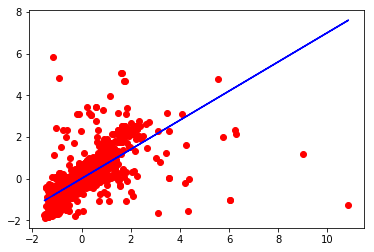

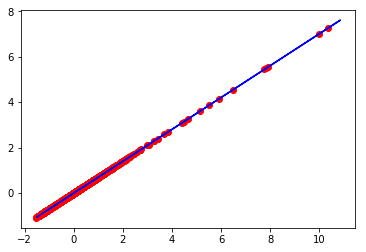

In [215]:
X = ds[['o_rcf_1_e']]
y = ds[['o_rcf_1_p']]

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/2,random_state = 0)


from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_pred, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.show()


The Cross-validation worked nearly perfect due to High $R^{2}$ value

Implementing multiple regression:


In [207]:
#ds_xy = ds[["i1_rcs_p","i1_dep_1_p","i1_rcf_1_p","i1_dlv_p"]]
X = ds[["i1_rcs_p","i1_dep_1_p","i1_rcf_1_p"]]
y = ds[["i1_dlv_p"]]

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,random_state = 0)


# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)



In [208]:
y_pred # multiple variables in x predicted the value of y through multiple regression

array([[ 4048.47050358],
       [ 2781.58647107],
       [ 3898.40687906],
       ..., 
       [ 3897.47780742],
       [ 2814.99153044],
       [ 3856.30724222]])

# Implementation of K-Means clustering

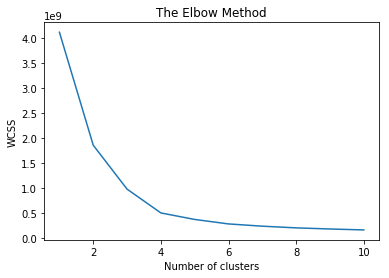

In [209]:
# Importing the dataset
# as_matrix is used to convert from pandas ds to np.array
X1 = ds.as_matrix(columns =["o_dep_2_e","o_dep_2_p"])
# y = dataset.iloc[:, 3].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Here, 4 clusters would be appropriate

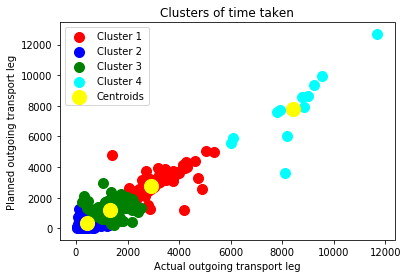

In [210]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X1)


# Visualising the K-Means clusters
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X1[y_kmeans == 3, 0], X1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.legend()
plt.title('Clusters of time taken')
plt.xlabel('Actual outgoing transport leg')
plt.ylabel('Planned outgoing transport leg')
plt.show()

# Implementation of Hierarchical Clustering

In [211]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X1)

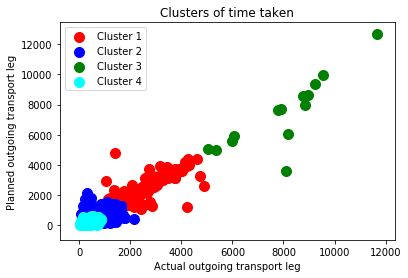

In [212]:
# Visualising the HC clusters
plt.scatter(X1[y_hc == 0, 0], X1[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_hc == 1, 0], X1[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[y_hc == 2, 0], X1[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X1[y_hc == 3, 0], X1[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of time taken')
plt.xlabel('Actual outgoing transport leg')
plt.ylabel('Planned outgoing transport leg')
plt.legend()
plt.show()

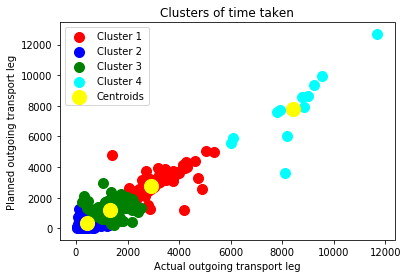

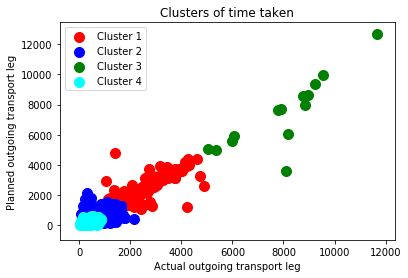

In [213]:
# To evaluate these two clustering techniques

# Visualising the K-Means clusters
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X1[y_kmeans == 3, 0], X1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.legend()
plt.title('Clusters of time taken')
plt.xlabel('Actual outgoing transport leg')
plt.ylabel('Planned outgoing transport leg')
plt.show()

# Visualising the HC clusters
plt.scatter(X1[y_hc == 0, 0], X1[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_hc == 1, 0], X1[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[y_hc == 2, 0], X1[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X1[y_hc == 3, 0], X1[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of time taken')
plt.xlabel('Actual outgoing transport leg')
plt.ylabel('Planned outgoing transport leg')
plt.legend()
plt.show()

We see that for the same data points, both the clustering methods provide similar clusters with slight differences due to the properties of the algorithms.

K-Means uses centroid method while Hierarchical clustering uses Euclidean distance for clustering.